#  PREDICTION OF LUNG CANCER

# Table of contents


1.   Importing libraries

2.   Data preparation
3.   Exploratory data analysis
4.   Support vector machine

    4.1 Linear Kernel <br>
    4.2 Gaussian Kernel <br>
    4.3 Polynomial Kernel <br>
5.  Comparison
6.  Testing
7.  Feature reduction



# 1. Importing libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score

from sklearn.svm import SVC, LinearSVC

from google.colab import drive
drive.mount('/content/drive')


seed = 42


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data preparation

In [23]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
print('The number of duplicates is')
df.duplicated().sum()

The number of duplicates is


33

In [24]:
df = df.drop_duplicates()
print('The number of duplicates is')
df.duplicated().sum()

The number of duplicates is


0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [8]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [25]:
df['LUNG_CANCER']=df['LUNG_CANCER'].map({'YES':1,'NO':0})
df['GENDER']=df['GENDER'].map({'M':1,'F':0})
df['SMOKING']=df['SMOKING'].map({2:1,1:0})
df['YELLOW_FINGERS']=df['YELLOW_FINGERS'].map({2:1,1:0})
df['PEER_PRESSURE']=df['PEER_PRESSURE'].map({2:1,1:0})
df['CHRONIC DISEASE']=df['CHRONIC DISEASE'].map({2:1,1:0})
df['FATIGUE ']=df['FATIGUE '].map({2:1,1:0})
df['ALLERGY ']=df['ALLERGY '].map({2:1,1:0})
df['WHEEZING']=df['WHEEZING'].map({2:1,1:0})
df['ALCOHOL CONSUMING']=df['ALCOHOL CONSUMING'].map({2:1,1:0})
df['COUGHING']=df['COUGHING'].map({2:1,1:0})
df['SWALLOWING DIFFICULTY']=df['SWALLOWING DIFFICULTY'].map({2:1,1:0})
df['CHEST PAIN']=df['CHEST PAIN'].map({2:1,1:0})
df['ANXIETY']=df['ANXIETY'].map({2:1,1:0})
df['SHORTNESS OF BREATH']=df['SHORTNESS OF BREATH'].map({2:1,1:0})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


There are no missing values. The 33 duplicates have been removed.
All the categorical values have been codified as 'YES' = 1, 'NO' = 0 and for GENDER 'MALE' = 1 and 'FEMALE' = 0

# 3. Exploratory data analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,276.0,0.514493,0.500698,0.0,0.00,1.0,1.0,1.0
AGE,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,0.543478,0.499011,0.0,0.00,1.0,1.0,1.0
YELLOW_FINGERS,276.0,0.576087,0.495075,0.0,0.00,1.0,1.0,1.0
ANXIETY,276.0,0.496377,0.500895,0.0,0.00,0.0,1.0,1.0
PEER_PRESSURE,276.0,0.507246,0.500856,0.0,0.00,1.0,1.0,1.0
CHRONIC DISEASE,276.0,0.521739,0.500435,0.0,0.00,1.0,1.0,1.0
FATIGUE,276.0,0.663043,0.473529,0.0,0.00,1.0,1.0,1.0
ALLERGY,276.0,0.547101,0.498681,0.0,0.00,1.0,1.0,1.0
WHEEZING,276.0,0.547101,0.498681,0.0,0.00,1.0,1.0,1.0


In [26]:
categorical=df.columns.drop('AGE')
print(categorical)

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


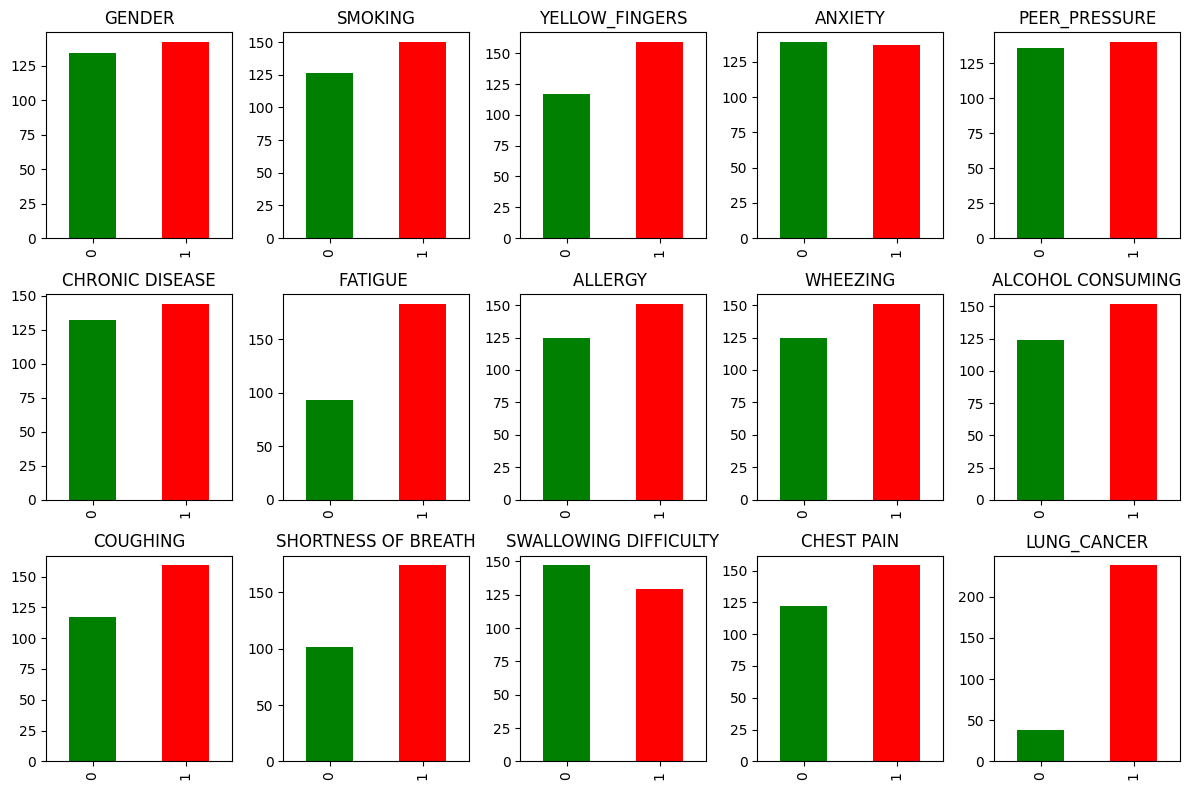

In [27]:
# histograms of the categorical variables
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))

colors = {0: 'green', 1: 'red'}

for i, ax in zip(categorical, axes.flatten()):
    value_counts_sorted = df[i].value_counts().sort_index()
    value_counts_sorted.plot(kind='bar', ax=ax, color=[colors.get(x, 'blue') for x in value_counts_sorted.index])
    ax.set_title(i)

plt.tight_layout()
plt.show()

In [28]:
#chi2 test for correlation
significant_vars = []

for i in categorical.drop('LUNG_CANCER'):
    contingency_table = pd.crosstab(df['LUNG_CANCER'], df[i])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    if p < 0.01:
        significant_vars.append(i)

print("Variables with high correlation with LUNG_CANCER (p < 0.01):", ', '.join(significant_vars))

Variables with high correlation with LUNG_CANCER (p < 0.01): YELLOW_FINGERS, PEER_PRESSURE, ALLERGY , WHEEZING, ALCOHOL CONSUMING, COUGHING, SWALLOWING DIFFICULTY, CHEST PAIN


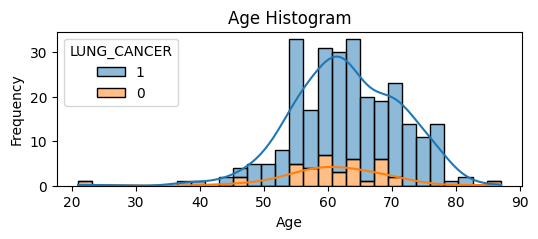

In [29]:
# age histogram divided for LUNG_CANCER
plt.figure(figsize=(6,2 ))
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(str)
sns.histplot(x='AGE', data=df, hue='LUNG_CANCER', bins=30, kde=True, multiple='stack')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.title('Age Histogram')

plt.show()

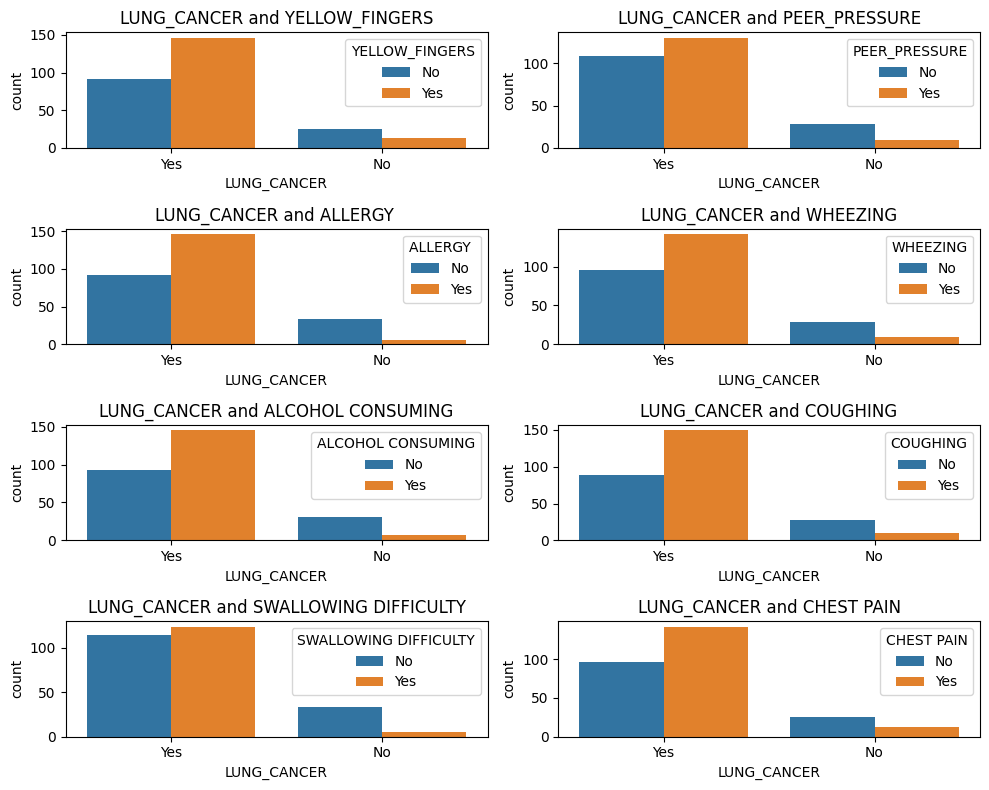

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

for i, ax in zip(significant_vars, axes.flatten()):

    contingency_table = pd.crosstab(df['LUNG_CANCER'], df[i])
    sns.countplot(x='LUNG_CANCER', hue=i, data=df, ax=ax)

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Yes', 'No'])
    leg_labels = ['No', 'Yes']

    for t, l in zip(ax.get_legend().texts, leg_labels):
        t.set_text(l)

    ax.set_title(f'LUNG_CANCER and {i}')

plt.tight_layout()
plt.show()

In [31]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(int)
print(f"The correlation between LUNG_CANCER and AGE is", df['LUNG_CANCER'].corr(df['AGE']))


The correlation between LUNG_CANCER and AGE is 0.10630456161354791


# 4. Support vector machine

In [32]:
y = df["LUNG_CANCER"]
X = df.drop(["LUNG_CANCER"], axis=1)

scaler = StandardScaler()

X_training, X_val, y_training, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.25, random_state=seed)

X_train = scaler.fit_transform(pd.DataFrame(X_train, columns=X.columns))
X_val = scaler.transform(pd.DataFrame(X_val, columns=X.columns))
X_test = scaler.transform(pd.DataFrame(X_test, columns=X.columns))


In [33]:
accuracys = []
precisions = []
recalls=[]
accuracys_test=[]
precisions_test=[]
recalls_test=[]

# 4.1 Linear kernel

Examples

In [126]:
print("Linear kernel C=0.01")
M = LinearSVC(C = .01, class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Linear kernel C=0.01
Accuracy: 85.5072463768116
Precision: 100.0
Recall: 82.14285714285714
[[13  0]
 [10 46]]


In [127]:
print("Linear kernel C=1")
M = LinearSVC(C = 1, class_weight='balanced', max_iter=10000)
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Linear kernel C=1
Accuracy: 85.5072463768116
Precision: 97.91666666666666
Recall: 83.92857142857143
[[12  1]
 [ 9 47]]


In [128]:
print("Linear kernel C=10")
M = LinearSVC(C = 10, class_weight='balanced', max_iter=100000)
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Linear kernel C=10
Accuracy: 85.5072463768116
Precision: 97.91666666666666
Recall: 83.92857142857143
[[12  1]
 [ 9 47]]


Best hyperparameters

In [34]:
grid = {'C': [0.01, 1, 10, 100]}

MS = GridSearchCV(estimator = LinearSVC(class_weight='balanced', max_iter=10000000),
                  param_grid = grid,
                  cv = 10,
                  verbose = 0
                  )

H = MS.fit(X_train,y_train)
print(f"Best hyperparameter for linear kernel is C={H.best_params_['C']}")

Best hyperparameter for linear kernel is C=1


Validation

Accuracy: 85.5072463768116
Precision: 97.91666666666666
Recall: 83.92857142857143


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

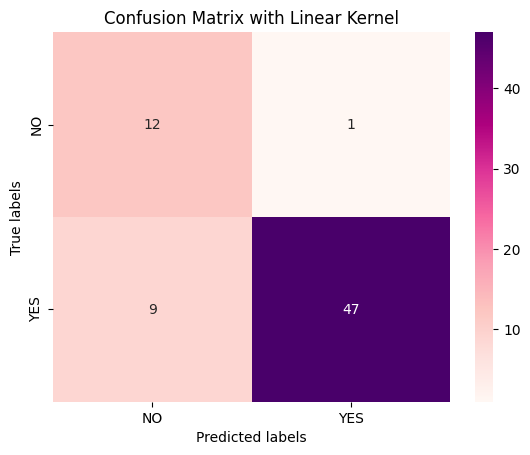

In [35]:
M = LinearSVC(C = H.best_params_['C'], class_weight='balanced',max_iter=10000000)
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
accuracys.append(float(f'{accuracy:.2f}'))
precisions.append(float(f'{precision:.2f}'))
recalls.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_val,y_predicted), annot=True, fmt='g', ax=ax, cmap="RdPu")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Linear Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])


Significant coefficients

<ipython-input-36-aab5a2975a5e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_names, y=top_coefficients, palette=palette)


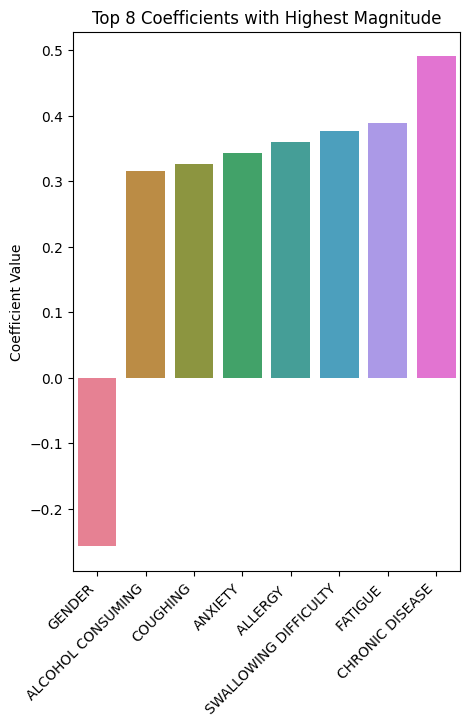

In [36]:
coefficients = M.coef_.flatten()
feature_names = X.columns

# Find indices of the 8 coefficients with the highest magnitude
top_indices = np.argsort(np.abs(coefficients))[-8:]
top_coefficients = coefficients[top_indices]
top_feature_names = [feature_names[i] for i in top_indices]

palette = sns.color_palette("husl", len(top_feature_names))

plt.figure(figsize=(5,7))
sns.barplot(x=top_feature_names, y=top_coefficients, palette=palette)
plt.ylabel('Coefficient Value')
plt.title('Top 8 Coefficients with Highest Magnitude')
plt.xticks(rotation=45, ha='right')
plt.show()

Testing

Accuracy: 84.61538461538461
Precision: 100.0
Recall: 83.33333333333334


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

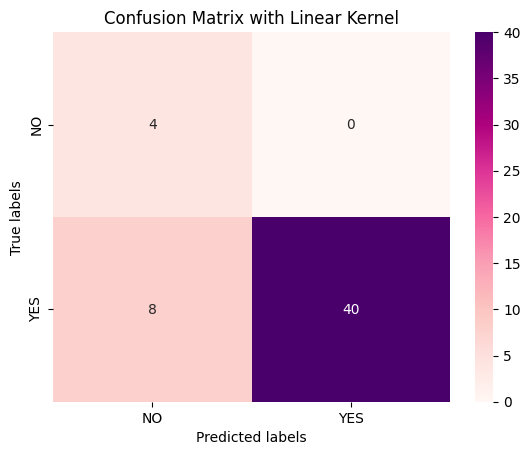

In [37]:
y_test_predicted= M.predict(X_test)
accuracy = accuracy_score( y_test, y_test_predicted)*100
precision = precision_score( y_test,y_test_predicted) * 100
recall = recall_score(y_test, y_test_predicted) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
accuracys_test.append(float(f'{accuracy:.2f}'))
precisions_test.append(float(f'{precision:.2f}'))
recalls_test.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_predicted), annot=True, fmt='g', ax=ax, cmap="RdPu")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Linear Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])

# 4.2 Gaussian kernel

Examples

In [38]:
print("Gaussian kernel C=0.01")
M = SVC(C = .01, kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)


accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))


Gaussian kernel C=0.01
Accuracy: 18.84057971014493
Precision: 0.0
Recall: 0.0
[[13  0]
 [56  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print("Gaussian kernel C=1")
M = SVC(C =1, kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Gaussian kernel C=1
Accuracy: 91.30434782608695
Precision: 96.29629629629629
Recall: 92.85714285714286
[[11  2]
 [ 4 52]]


In [40]:
print("Gaussian kernel C=10")
M = SVC(C = 10, kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Gaussian kernel C=10
Accuracy: 89.85507246376811
Precision: 91.52542372881356
Recall: 96.42857142857143
[[ 8  5]
 [ 2 54]]


Fixed C=1 let's see how gamma influence

In [41]:
print("Gaussian kernel C=1, gamma=0.001")
M = SVC(C =1, gamma=0.001, kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Gaussian kernel C=1, gamma=0.001
Accuracy: 73.91304347826086
Precision: 100.0
Recall: 67.85714285714286
[[13  0]
 [18 38]]


In [42]:
print("Gaussian kernel C=1, gamma=0.01")
M = SVC(C =1, gamma=0.01, kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Gaussian kernel C=1, gamma=0.01
Accuracy: 91.30434782608695
Precision: 98.07692307692307
Recall: 91.07142857142857
[[12  1]
 [ 5 51]]


In [43]:
print("Gaussian kernel C=1, gamma=10")
M = SVC(C =1, gamma=10, kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Gaussian kernel C=1, gamma=10
Accuracy: 81.15942028985508
Precision: 81.15942028985508
Recall: 100.0
[[ 0 13]
 [ 0 56]]


Best hyperparameters

In [58]:
grid = {'C': [0.01, 1, 10, 100, 1000],  'gamma': [1, 0.01,0.02,0.03,0.04,0.05, 0.001, 0.0001],'kernel': ['rbf']}

MS = GridSearchCV(estimator = SVC(class_weight='balanced'),
                  param_grid = grid,
                  cv = 10,
                  verbose = 0
                  )

H = MS.fit(X_train,y_train)
print(f"Best hyperparameters for gaussian kernel are C={H.best_params_['C']} and gamma={H.best_params_['gamma']}")

Best hyperparameters for gaussian kernel are C=1 and gamma=1


Validation

Accuracy: 85.5072463768116
Precision: 84.84848484848484
Recall: 100.0


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

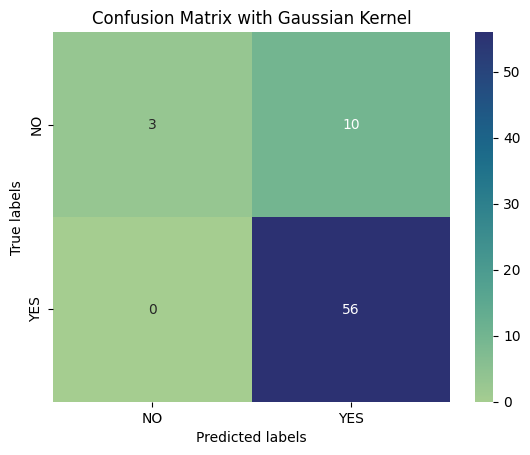

In [59]:
M = SVC(C = H.best_params_['C'], gamma= H.best_params_['gamma'], kernel = 'rbf', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys.append(float(f'{accuracy:.2f}'))
precisions.append(float(f'{precision:.2f}'))
recalls.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_val,y_predicted), annot=True, fmt='g', ax=ax, cmap="crest")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Gaussian Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])


Testing

Accuracy: 88.46153846153845
Precision: 93.75
Recall: 93.75


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

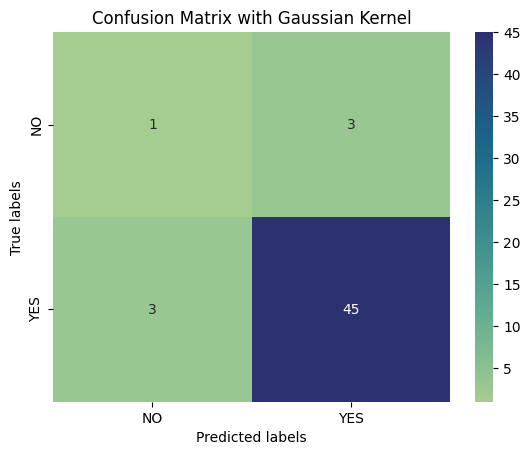

In [60]:
y_test_predicted= M.predict(X_test)

accuracy = accuracy_score(y_test_predicted, y_test)*100
precision = precision_score(y_test, y_test_predicted) * 100
recall = recall_score(y_test, y_test_predicted) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys_test.append(float(f'{accuracy:.2f}'))
precisions_test.append(float(f'{precision:.2f}'))
recalls_test.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_test_predicted), annot=True, fmt='g', ax=ax, cmap="crest")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Gaussian Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])

# 4.3 Polynomial kernel

default with degree 3 and gamma as rbf

Examples

In [50]:
print("Polynomial kernel C=0.01")
M = SVC(C = 0.01, kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=0.01
Accuracy: 18.84057971014493
Precision: 0.0
Recall: 0.0
[[13  0]
 [56  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("Polynomial kernel C=1")
M = SVC(C = 1, kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1
Accuracy: 89.85507246376811
Precision: 91.52542372881356
Recall: 96.42857142857143
[[ 8  5]
 [ 2 54]]


In [52]:
print("Polynomial kernel C=10")
M = SVC(C = 10, kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=10
Accuracy: 89.85507246376811
Precision: 91.52542372881356
Recall: 96.42857142857143
[[ 8  5]
 [ 2 54]]


Fixed C=1, let's change gamma

In [53]:
print("Polynomial kernel C=1, gamma=0.001")
M = SVC(C = 1, gamma=0.001,kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1, gamma=0.001
Accuracy: 18.84057971014493
Precision: 0.0
Recall: 0.0
[[13  0]
 [56  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print("Polynomial kernel C=1, gamma=0.1")
M = SVC(C = 1, gamma=0.1,kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1, gamma=0.1
Accuracy: 91.30434782608695
Precision: 91.66666666666666
Recall: 98.21428571428571
[[ 8  5]
 [ 1 55]]


In [55]:
print("Polynomial kernel C=1, gamma=10")
M = SVC(C = 1, gamma=10,kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)
accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1, gamma=10
Accuracy: 88.40579710144928
Precision: 91.37931034482759
Recall: 94.64285714285714
[[ 8  5]
 [ 3 53]]


Fixed C=1 and gamma=1, let's check the degree

In [56]:
print("Polynomial kernel C=1, gamma=0.1, degree=1")
M = SVC(C = 1, degree=1, gamma=0.1,kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1, gamma=0.1, degree=1
Accuracy: 84.05797101449275
Precision: 97.87234042553192
Recall: 82.14285714285714
[[12  1]
 [10 46]]


In [57]:
print("Polynomial kernel C=1, gamma=0.1, degree=3")
M = SVC(C = 1, degree=3, gamma=0.1,kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1, gamma=0.1, degree=3
Accuracy: 91.30434782608695
Precision: 91.66666666666666
Recall: 98.21428571428571
[[ 8  5]
 [ 1 55]]


In [58]:
print("Polynomial kernel C=1, gamma=0.1, degree=5")
M = SVC(C = 10, degree=5, gamma=0.1,kernel = 'poly', class_weight='balanced')
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

print(confusion_matrix(y_val,y_predicted))

Polynomial kernel C=1, gamma=0.1, degree=5
Accuracy: 88.40579710144928
Precision: 88.70967741935483
Recall: 98.21428571428571
[[ 6  7]
 [ 1 55]]


Best hyperparameters

In [61]:
grid = {'C': [0.01, 1, 10, 100, 1000],  'kernel': ['poly'],'degree': [1,2,3,4,5],'gamma':[1, 0.01,0.02,0.03,0.04,0.05, 0.001, 0.0001] }

MS = GridSearchCV(estimator = SVC(class_weight='balanced'),
                  param_grid = grid,
                  cv = 10,
                  verbose = 0
                  )

H = MS.fit(X_train,y_train)
print(f"Best hyperparameters for polynomial kernel are C={H.best_params_['C']}, gamma={H.best_params_['gamma']} and degree={H.best_params_['degree']}")

Best hyperparameters for polynomial kernel are C=100, gamma=0.01 and degree=4


Validation

Accuracy: 81.15942028985508
Precision: 81.15942028985508
Recall: 100.0


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

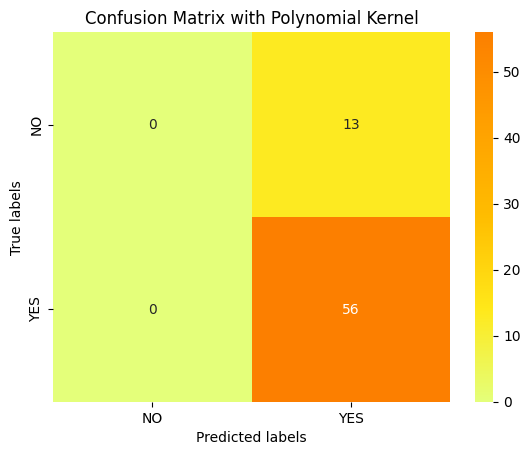

In [62]:
M = SVC(C = H.best_params_['C'], gamma= H.best_params_['gamma'], kernel = 'poly', degree=H.best_params_['degree'])
M.fit(X_train,y_train)
y_predicted= M.predict(X_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys.append(float(f'{accuracy:.2f}'))
precisions.append(float(f'{precision:.2f}'))
recalls.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_val,y_predicted), annot=True, fmt='g', ax=ax, cmap="Wistia")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Polynomial Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])


Testing

Accuracy: 92.3076923076923
Precision: 100.0
Recall: 100.0


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

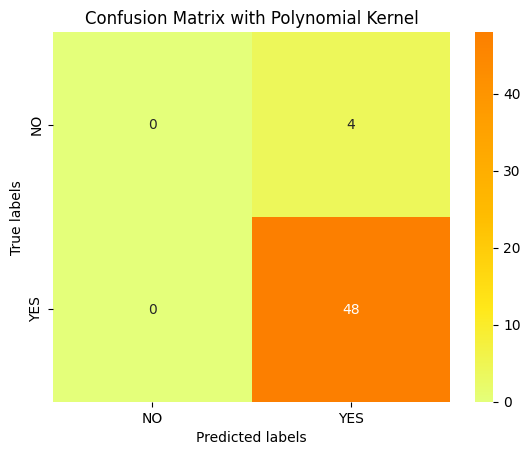

In [63]:
y_test_predicted= M.predict(X_test)

accuracy = accuracy_score(y_test_predicted, y_test)*100
precision = precision_score(y_test_predicted, y_test) * 100
recall = precision_score(y_test_predicted, y_test) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys_test.append(float(f'{accuracy:.2f}'))
precisions_test.append(float(f'{precision:.2f}'))
recalls_test.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_predicted), annot=True, fmt='g', ax=ax, cmap="Wistia")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Polynomial Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])

# 5. Comparison

<ipython-input-64-9d139edf8a45>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=accuracys, palette=palet, ax=ax1)
<ipython-input-64-9d139edf8a45>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=precisions, palette=palet, ax=ax2)
<ipython-input-64-9d139edf8a45>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=recalls, palette=palet, ax=ax3)


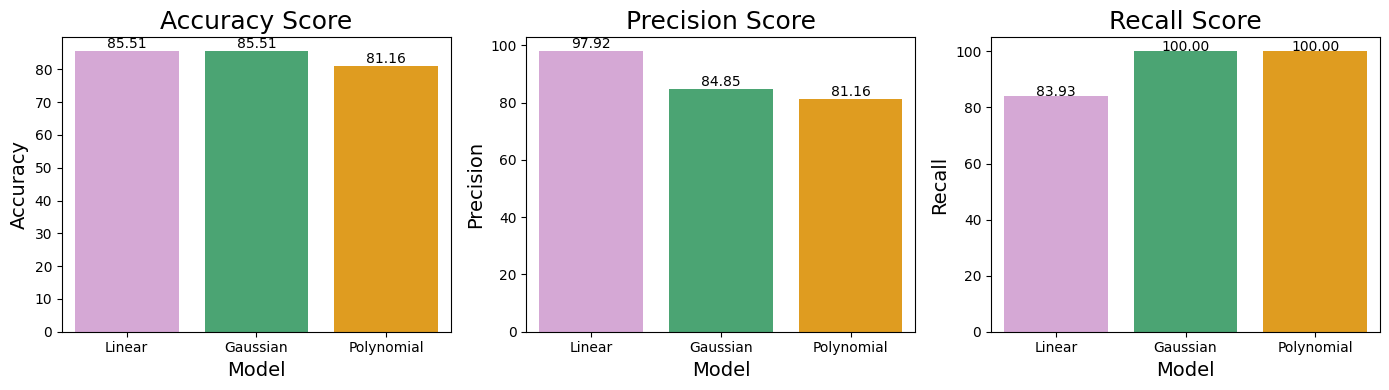

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
model_name = ['Linear', 'Gaussian', 'Polynomial']
palet = ['plum','mediumseagreen','orange']

# Accuracy Score
sns.barplot(x=model_name, y=accuracys, palette=palet, ax=ax1)
for matrix, accuracy in enumerate(accuracys):
    ax1.text(matrix, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontsize=10)
ax1.set_title('Accuracy Score', size=18)
ax1.set_xlabel('Model', size=14)
ax1.set_ylabel('Accuracy', size=14)

# Precision Score
sns.barplot(x=model_name, y=precisions, palette=palet, ax=ax2)
for matrix, precision in enumerate(precisions):
    ax2.text(matrix, precision, f'{precision:.2f}', ha='center', va='bottom')
ax2.set_title('Precision Score', size=18)
ax2.set_xlabel('Model', size=14)
ax2.set_ylabel('Precision', size=14)

# Recall Score
sns.barplot(x=model_name, y=recalls, palette=palet, ax=ax3)
for matrix, recall in enumerate(recalls):
    ax3.text(matrix, recall + 4, f'{recall:.2f}', ha='center', va='top', color='black')
ax3.set_title('Recall Score', size=18)
ax3.set_xlabel('Model', size=14)
ax3.set_ylabel('Recall', size=14)

plt.tight_layout()
plt.show()

# 6. Testing

<ipython-input-65-be8542f9271b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=accuracys_test, palette=palet, ax=ax1)
<ipython-input-65-be8542f9271b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=precisions_test, palette=palet, ax=ax2)
<ipython-input-65-be8542f9271b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=recalls_test, palette=palet, ax=ax3)


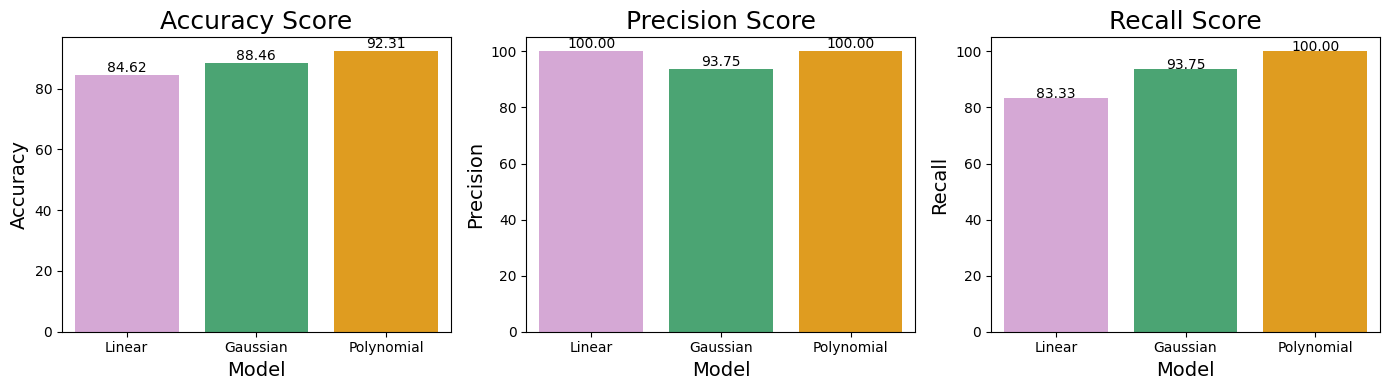

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

# Accuracy Score
sns.barplot(x=model_name, y=accuracys_test, palette=palet, ax=ax1)
for matrix, accuracy in enumerate(accuracys_test):
    ax1.text(matrix, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontsize=10)
ax1.set_title('Accuracy Score', size=18)
ax1.set_xlabel('Model', size=14)
ax1.set_ylabel('Accuracy', size=14)

# Precision Score
sns.barplot(x=model_name, y=precisions_test, palette=palet, ax=ax2)
for matrix, precision in enumerate(precisions_test):
    ax2.text(matrix, precision, f'{precision:.2f}', ha='center', va='bottom')
ax2.set_title('Precision Score', size=18)
ax2.set_xlabel('Model', size=14)
ax2.set_ylabel('Precision', size=14)

# Recall Score
sns.barplot(x=model_name, y=recalls_test, palette=palet, ax=ax3)
for matrix, recall in enumerate(recalls_test):
    ax3.text(matrix, recall + 4, f'{recall:.2f}', ha='center', va='top', color='black')
ax3.set_title('Recall Score', size=18)
ax3.set_xlabel('Model', size=14)
ax3.set_ylabel('Recall', size=14)

plt.tight_layout()
plt.show()

# 7. Feature reduction

In [102]:
accuracys_red=[]
precisions_red=[]
recalls_red=[]

accuracys_red_test=[]
precisions_red_test=[]
recalls_red_test=[]

Linear kernel

In [103]:
grid = {'C': [0.01, 1, 10, 100]}
top_columns = X_train[:, top_indices]
top_columns_val = X_val[:, top_indices]

MS = GridSearchCV(estimator = LinearSVC(class_weight='balanced', max_iter=10000000),
                  param_grid = grid,
                  cv = 10,
                  verbose = 0
                  )

H = MS.fit(top_columns,y_train)
print(f"Best hyperparameter for linear kernel is C={H.best_params_['C']}")

Best hyperparameter for linear kernel is C=1


Accuracy: 84.05797101449275
Precision: 97.87234042553192
Recall: 82.14285714285714


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

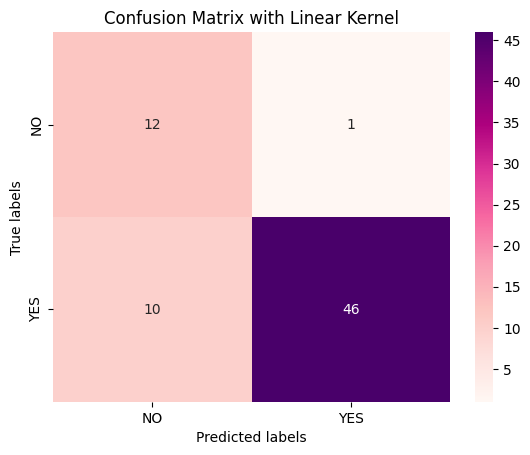

In [104]:
M = LinearSVC(C = H.best_params_['C'], class_weight='balanced',max_iter=10000000)
M.fit(top_columns,y_train)
y_predicted= M.predict(top_columns_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys_red.append(float(f'{accuracy:.2f}'))
precisions_red.append(float(f'{precision:.2f}'))
recalls_red.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_val,y_predicted), annot=True, fmt='g', ax=ax, cmap="RdPu")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Linear Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])

Accuracy: 84.61538461538461
Precision: 100.0
Recall: 83.33333333333334


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

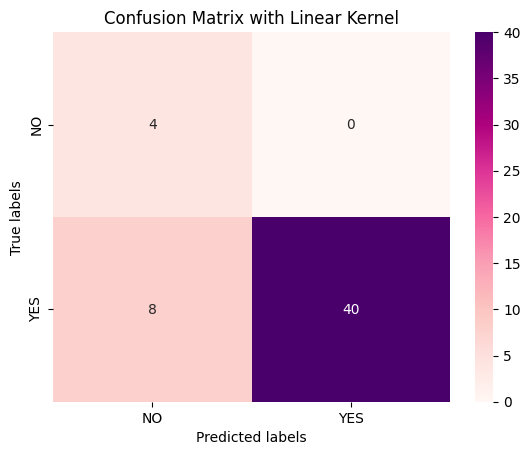

In [105]:
#testing
top_columns_test = X_test[:, top_indices]
y_predicted_test= M.predict(top_columns_test)

accuracy = accuracy_score(y_test,y_predicted_test)*100
precision = precision_score(y_test, y_predicted_test) * 100
recall = recall_score(y_test, y_predicted_test) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys_red_test.append(float(f'{accuracy:.2f}'))
precisions_red_test.append(float(f'{precision:.2f}'))
recalls_red_test.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_predicted_test), annot=True, fmt='g', ax=ax, cmap="RdPu")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Linear Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])

Gaussian kernel

In [106]:
grid = {'C': [0.01, 1, 10, 100, 1000],  'gamma': [1, 0.01,0.02,0.03,0.04,0.05, 0.001, 0.0001],'kernel': ['rbf']}

MS = GridSearchCV(estimator = SVC(class_weight='balanced'),
                  param_grid = grid,
                  cv = 10,
                  verbose = 0
                  )

H = MS.fit(top_columns,y_train)
print(f"Best hyperparameters for gaussian kernel are C={H.best_params_['C']} and gamma={H.best_params_['gamma']}")

Best hyperparameters for gaussian kernel are C=1 and gamma=0.02


Accuracy: 85.5072463768116
Precision: 96.0
Recall: 85.71428571428571


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

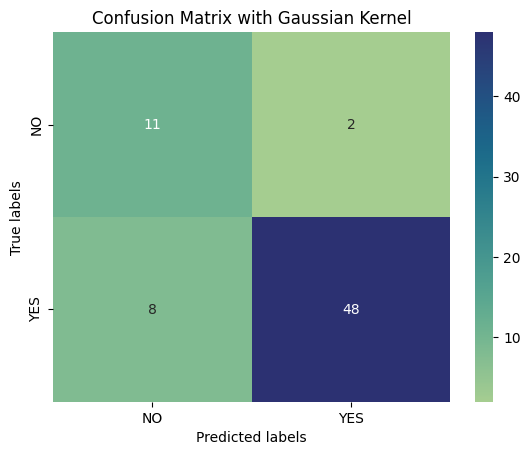

In [107]:
M = SVC(C = H.best_params_['C'], gamma= H.best_params_['gamma'], kernel = 'rbf', class_weight='balanced')
M.fit(top_columns,y_train)
y_predicted= M.predict(top_columns_val)

accuracy = accuracy_score(y_val,y_predicted)*100
precision = precision_score(y_val, y_predicted) * 100
recall = recall_score(y_val, y_predicted) * 100

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys.append(float(f'{accuracy:.2f}'))
precisions.append(float(f'{precision:.2f}'))
recalls.append(float(f'{recall:.2f}'))

accuracys_red.append(float(f'{accuracy:.2f}'))
precisions_red.append(float(f'{precision:.2f}'))
recalls_red.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_val,y_predicted), annot=True, fmt='g', ax=ax, cmap="crest")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Gaussian Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])


Accuracy: 82.6923076923077
Precision: 100.0
Recall: 81.25


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

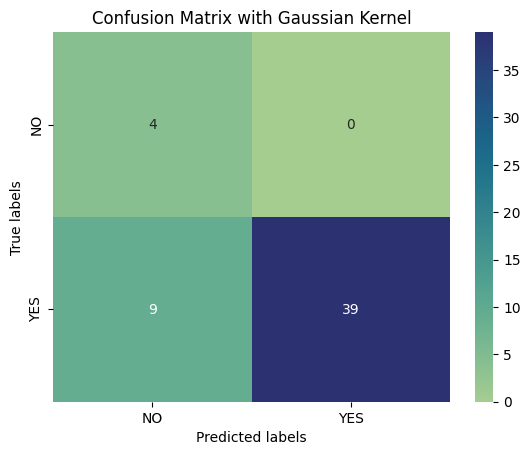

In [111]:
#testing
y_predicted_test= M.predict(top_columns_test)

accuracy = accuracy_score(y_test,y_predicted_test)*100
precision = precision_score(y_test, y_predicted_test) * 100
recall = recall_score(y_test, y_predicted_test) * 100
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)

accuracys_red_test.append(float(f'{accuracy:.2f}'))
precisions_red_test.append(float(f'{precision:.2f}'))
recalls_red_test.append(float(f'{recall:.2f}'))

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_predicted_test), annot=True, fmt='g', ax=ax, cmap="crest")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Gaussian Kernel')
ax.xaxis.set_ticklabels(['NO', 'YES'])
ax.yaxis.set_ticklabels(['NO', 'YES'])

Comparing

<ipython-input-109-c42bd69cbc23>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=accuracys_red, palette=palet, ax=ax1)
<ipython-input-109-c42bd69cbc23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=precisions_red, palette=palet, ax=ax2)
<ipython-input-109-c42bd69cbc23>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=recalls_red, palette=palet, ax=ax3)


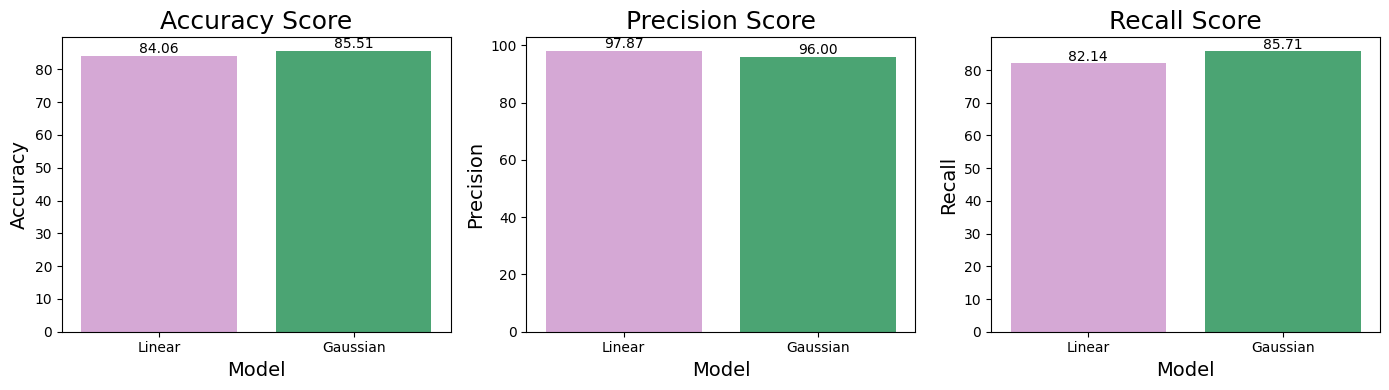

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
model_name = ['Linear', 'Gaussian']
palet = ['plum','mediumseagreen']


# Accuracy Score
sns.barplot(x=model_name, y=accuracys_red, palette=palet, ax=ax1)
for matrix, accuracy in enumerate(accuracys_red):
    ax1.text(matrix, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontsize=10)
ax1.set_title('Accuracy Score', size=18)
ax1.set_xlabel('Model', size=14)
ax1.set_ylabel('Accuracy', size=14)

# Precision Score
sns.barplot(x=model_name, y=precisions_red, palette=palet, ax=ax2)
for matrix, precision in enumerate(precisions_red):
    ax2.text(matrix, precision, f'{precision:.2f}', ha='center', va='bottom')
ax2.set_title('Precision Score', size=18)
ax2.set_xlabel('Model', size=14)
ax2.set_ylabel('Precision', size=14)

# Recall Score
sns.barplot(x=model_name, y=recalls_red, palette=palet, ax=ax3)
for matrix, recall in enumerate(recalls_red):
    ax3.text(matrix, recall + 4, f'{recall:.2f}', ha='center', va='top', color='black')
ax3.set_title('Recall Score', size=18)
ax3.set_xlabel('Model', size=14)
ax3.set_ylabel('Recall', size=14)

plt.tight_layout()
plt.show()

<ipython-input-110-35a354741afe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=accuracys_red_test, palette=palet, ax=ax1)
<ipython-input-110-35a354741afe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=precisions_red_test, palette=palet, ax=ax2)
<ipython-input-110-35a354741afe>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_name, y=recalls_red_test, palette=palet, ax=ax3)


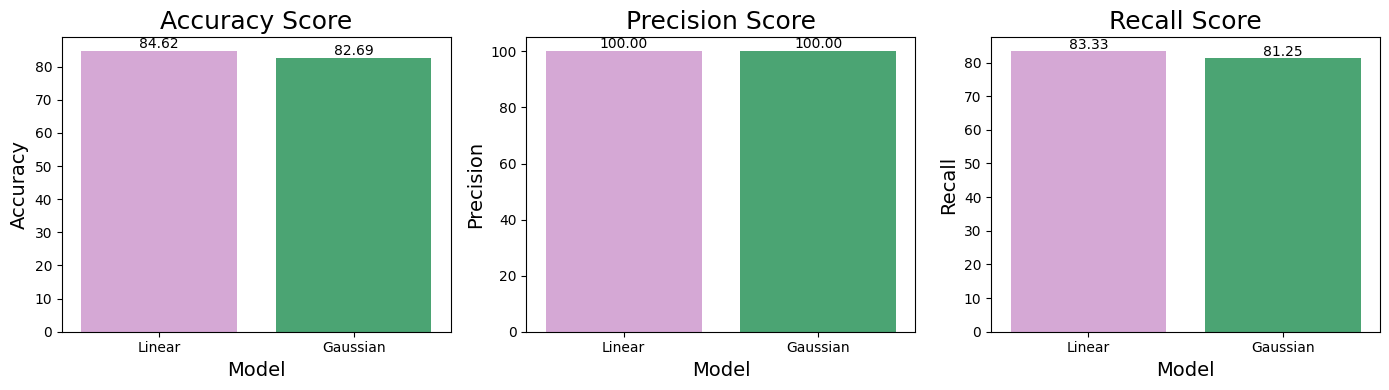

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

# Accuracy Score
sns.barplot(x=model_name, y=accuracys_red_test, palette=palet, ax=ax1)
for matrix, accuracy in enumerate(accuracys_red_test):
    ax1.text(matrix, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontsize=10)
ax1.set_title('Accuracy Score', size=18)
ax1.set_xlabel('Model', size=14)
ax1.set_ylabel('Accuracy', size=14)

# Precision Score
sns.barplot(x=model_name, y=precisions_red_test, palette=palet, ax=ax2)
for matrix, precision in enumerate(precisions_red_test):
    ax2.text(matrix, precision, f'{precision:.2f}', ha='center', va='bottom')
ax2.set_title('Precision Score', size=18)
ax2.set_xlabel('Model', size=14)
ax2.set_ylabel('Precision', size=14)

# Recall Score
sns.barplot(x=model_name, y=recalls_red_test, palette=palet, ax=ax3)
for matrix, recall in enumerate(recalls_red_test):
    ax3.text(matrix, recall + 4, f'{recall:.2f}', ha='center', va='top', color='black')
ax3.set_title('Recall Score', size=18)
ax3.set_xlabel('Model', size=14)
ax3.set_ylabel('Recall', size=14)

plt.tight_layout()
plt.show()